In [43]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa

from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [44]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Formatting and Loading dataset - Successful')

Formatting and Loading dataset - Successful


In [45]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [46]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [47]:
len(paths)

5600

In [48]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [49]:
df['label'].value_counts()

fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: label, dtype: int64

In [50]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(8,3))
    plt.title(emotion, size=15)
    plt.plot(data)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(8,3))
    plt.title(emotion, size=15)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

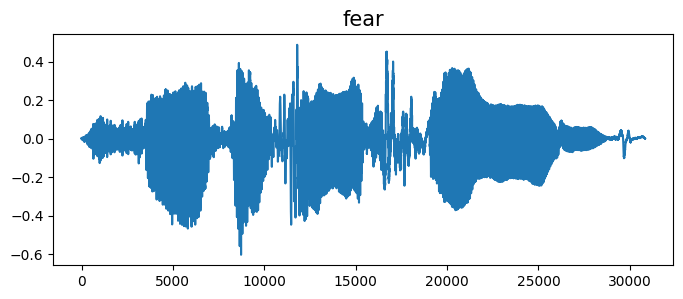

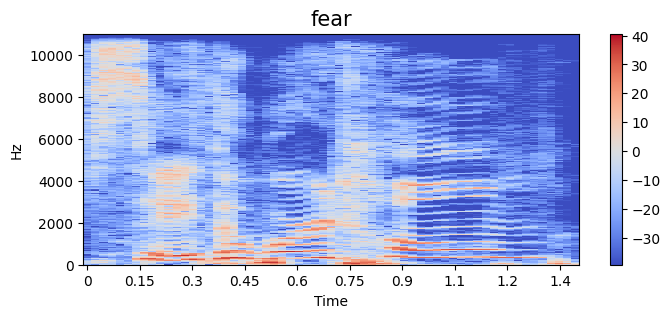

In [9]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)


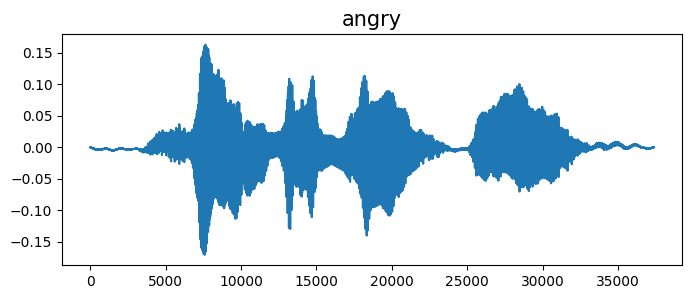

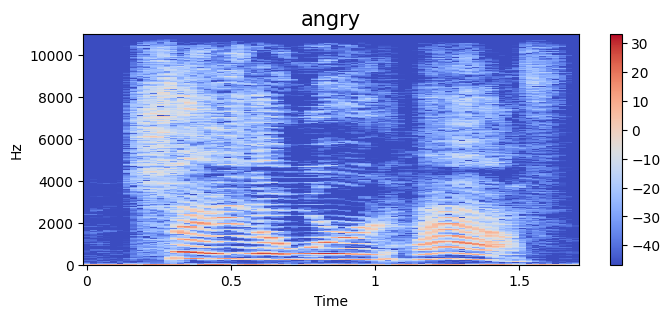

In [10]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

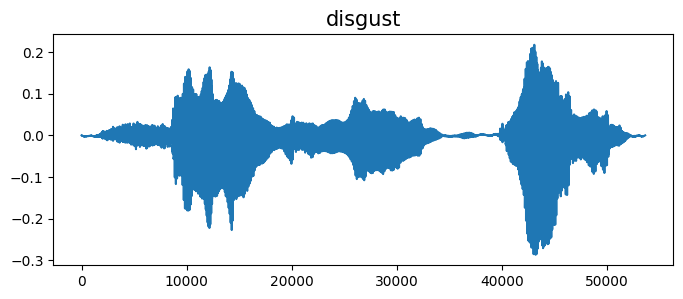

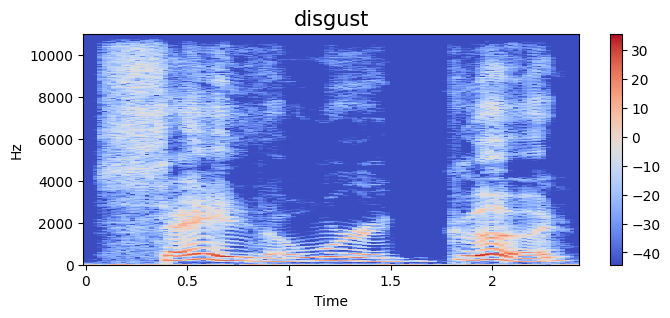

In [11]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

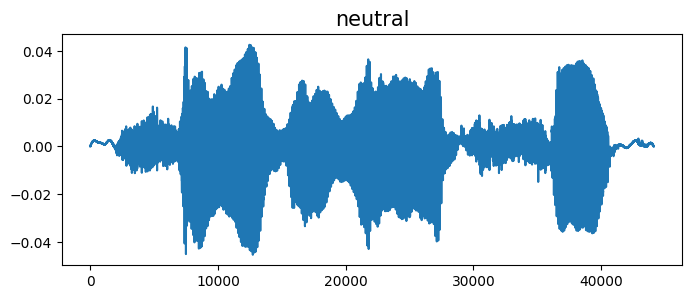

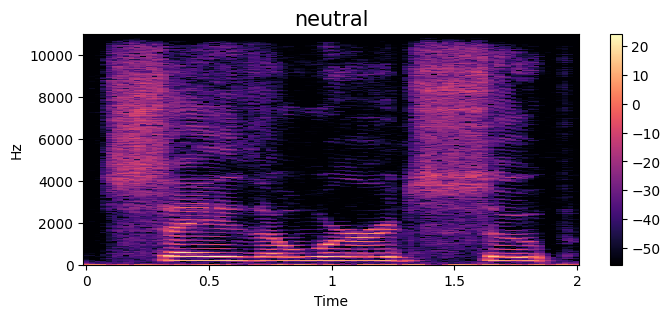

In [12]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

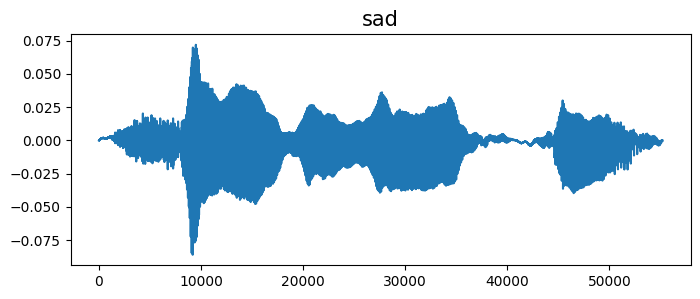

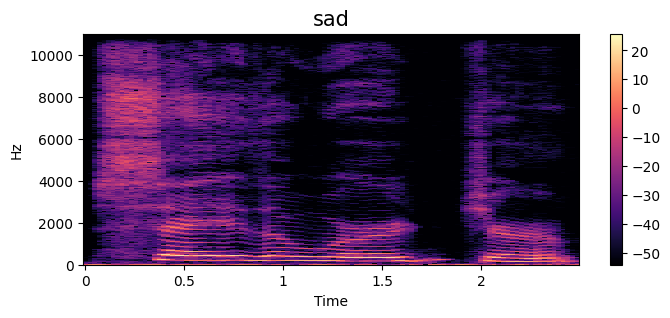

In [13]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

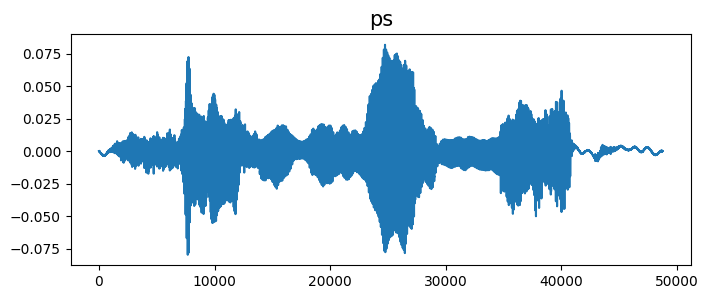

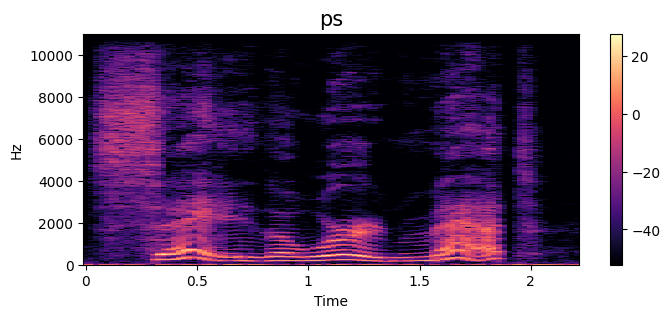

In [14]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

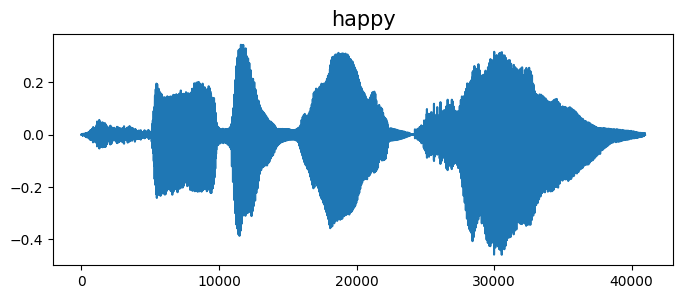

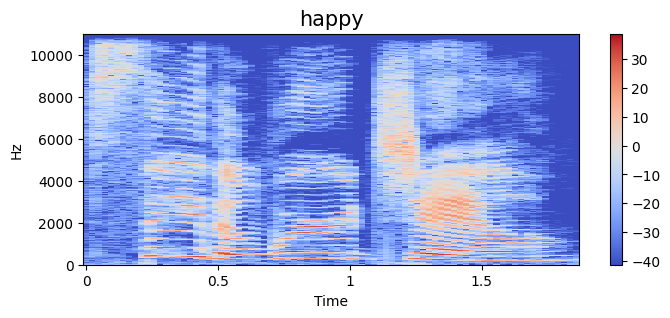

In [15]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [51]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [52]:
extract_mfcc(df['speech'][0])

array([-285.7373    ,   85.78295   ,   -2.1689105 ,   22.125532  ,
        -14.757396  ,   11.051346  ,   12.412452  ,   -3.0002632 ,
          1.0844971 ,   11.078272  ,  -17.419662  ,   -8.093215  ,
          6.5879736 ,   -4.220953  ,   -9.15508   ,    3.521479  ,
        -13.186381  ,   14.078853  ,   19.669733  ,   22.725618  ,
         32.574642  ,   16.325031  ,   -3.8427277 ,    0.89629626,
        -11.239262  ,    6.653462  ,   -2.5883691 ,   -7.7140174 ,
        -10.941658  ,   -2.4007556 ,   -5.2812862 ,    4.2711563 ,
        -11.202216  ,   -9.024621  ,   -3.6669848 ,    4.8697433 ,
         -1.6027985 ,    2.5600505 ,   11.454375  ,   11.23345   ],
      dtype=float32)

In [53]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [54]:
X_mfcc

0       [-285.7373, 85.78295, -2.1689105, 22.125532, -...
1       [-348.34332, 35.193233, -3.8413274, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.6343, 21.25971, -4.4110823, 6.4871554, -...
4       [-344.7548, 46.329193, -24.171415, 19.392921, ...
                              ...                        
5595    [-374.39523, 60.865, 0.025058376, 8.431059, -2...
5596    [-313.9648, 39.847843, -5.6493053, -3.8675752,...
5597    [-357.54886, 77.88606, -15.224756, 2.1946328, ...
5598    [-353.14743, 101.68391, -14.175895, -12.037377...
5599    [-389.4595, 54.042767, 1.3469967, -1.4258995, ...
Name: speech, Length: 5600, dtype: object

In [65]:
def extract_pitch(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    pitches, magnitudes = librosa.core.pitch.piptrack(y=y, sr=sr)
    pitch = pitches.mean()
    return pitch

In [66]:
extract_pitch(df['speech'][0])

5.6093235

In [67]:
A_pitch = df['speech'].apply(lambda a: extract_pitch(a))

In [68]:
A_pitch

0        5.609324
1        8.618578
2       18.714079
3       31.710331
4       38.711830
          ...    
5595    24.427141
5596    22.720881
5597    25.247459
5598     6.392531
5599    14.717337
Name: speech, Length: 5600, dtype: float32

In [72]:
def extract_rhythm_features(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    onset_env = librosa.onset.onset_strength(y=y, sr=sr)
    rhythm_features = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr)
    
    return tempo, rhythm_features


In [73]:
extract_rhythm_features(df['speech'][0])

(172.265625,
 array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
          1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
        [ 8.86781519e-01,  8.87565426e-01,  8.88348814e-01, ...,
          9.14790725e-01,  9.15565036e-01,  9.16339211e-01],
        [ 7.92965890e-01,  7.94307676e-01,  7.95649933e-01, ...,
          8.41692900e-01,  8.43061384e-01,  8.44430714e-01],
        ...,
        [-2.08945285e-17, -1.75527402e-17, -2.55373871e-17, ...,
         -1.34289609e-16,  9.47106099e-18, -9.12908722e-17],
        [-1.47210073e-17, -4.83900954e-17, -2.18318340e-17, ...,
         -2.03767146e-16,  6.00345436e-17, -1.59347276e-16],
        [ 2.77952374e-17, -3.66812651e-17, -3.87060782e-18, ...,
         -1.26980749e-16, -4.19095063e-17, -4.92114858e-17]]))

In [74]:
B_rhythm = df['speech'].apply(lambda b: extract_rhythm_features(b))

In [75]:
B_rhythm

0       (172.265625, [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1...
1       (129.19921875, [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
2       (151.99908088235293, [[1.0, 1.0, 1.0, 1.0, 1.0...
3       (151.99908088235293, [[1.0, 1.0, 1.0, 1.0, 1.0...
4       (129.19921875, [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
                              ...                        
5595    (151.99908088235293, [[1.0, 1.0, 1.0, 1.0, 1.0...
5596    (129.19921875, [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
5597    (151.99908088235293, [[1.0, 1.0, 1.0, 1.0, 1.0...
5598    (99.38401442307692, [[1.0, 1.0, 1.0, 1.0, 1.0,...
5599    (99.38401442307692, [[1.0, 1.0, 1.0, 1.0, 1.0,...
Name: speech, Length: 5600, dtype: object

In [83]:
def extract_spectral_contrast(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    
    return spectral_contrast

In [84]:
extract_spectral_contrast(df['speech'][0])

array([[14.32512406, 13.01818447, 13.2918005 , 14.7160132 ,  9.62969471,
        22.08717819, 17.51139362, 13.40719942,  7.55026941, 18.7357507 ,
        17.31786891, 12.91426592, 14.34637698, 12.7224351 , 10.22701462,
        14.24555251, 13.10046279, 11.61513202, 14.45039717, 14.09204441,
        18.88683141, 19.8154204 , 18.23374141, 21.83976385, 16.5565835 ,
        15.59767905, 14.8613668 , 14.83507124, 15.56305957, 16.58499757,
        19.99063572, 17.93171813, 15.44844205, 14.02934288, 17.55633739,
        12.3050112 , 11.67656971, 10.7732316 , 10.6179779 ],
       [14.96774776, 22.6836445 , 27.69686125, 23.86654756, 29.5183639 ,
        31.02081611, 33.60654502, 32.92300195, 24.86971769, 20.22977648,
        16.39765871, 14.13997418, 12.83590232, 13.24393235, 11.53638369,
        18.08461631, 22.13328282, 24.09353859, 35.43706885, 31.12878132,
        36.31457814, 33.81143959, 35.90138462, 38.40422834, 36.42161227,
        33.12132873, 37.41758409, 35.14621538, 33.34060493, 28.

In [85]:
C_spectral = df['speech'].apply(lambda c: extract_spectral_contrast(c))

In [86]:
C_spectral

0       [[14.325124064850861, 13.018184473250344, 13.2...
1       [[10.397491879161098, 12.0914587528459, 13.250...
2       [[9.72221949593862, 8.053670603812302, 8.88423...
3       [[3.5133137101901064, 4.654549529782589, 9.011...
4       [[5.235194146998332, 17.868645337745203, 19.30...
                              ...                        
5595    [[5.270430358918684, 15.858115524731508, 19.40...
5596    [[14.895941454313583, 14.909213777807071, 10.7...
5597    [[6.360647033788203, 14.091259834460876, 18.20...
5598    [[11.15433173716335, 19.435109168546646, 20.85...
5599    [[8.010088526691087, 11.472966859001945, 8.389...
Name: speech, Length: 5600, dtype: object

In [55]:
X = [x for x in X_mfcc]
X = np.expand_dims(X, -1)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])
y = y.toarray()
y.shape

(5600, 7)

In [56]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 123)               61500     
                                                                 
 dense_6 (Dense)             (None, 64)                7936      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71,747
Trainable params: 71,747
Non-trai

In [57]:
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=512, shuffle= True)

Epoch 1/100
9/9 [==============================] - 4s 70ms/step - loss: 1.8092 - accuracy: 0.3004 - val_loss: 2.0474 - val_accuracy: 0.0964
Epoch 2/100
9/9 [==============================] - 0s 16ms/step - loss: 1.5328 - accuracy: 0.4775 - val_loss: 1.9641 - val_accuracy: 0.1071
Epoch 3/100
9/9 [==============================] - 0s 15ms/step - loss: 1.1838 - accuracy: 0.6304 - val_loss: 1.7996 - val_accuracy: 0.1187
Epoch 4/100
9/9 [==============================] - 0s 15ms/step - loss: 0.8176 - accuracy: 0.7301 - val_loss: 1.3087 - val_accuracy: 0.4634
Epoch 5/100
9/9 [==============================] - 0s 15ms/step - loss: 0.6028 - accuracy: 0.7967 - val_loss: 0.9427 - val_accuracy: 0.5911
Epoch 6/100
9/9 [==============================] - 0s 14ms/step - loss: 0.4401 - accuracy: 0.8460 - val_loss: 0.6156 - val_accuracy: 0.7750
Epoch 7/100
9/9 [==============================] - 0s 14ms/step - loss: 0.3309 - accuracy: 0.8826 - val_loss: 0.4824 - val_accuracy: 0.8304
Epoch 8/100
9/9 [===

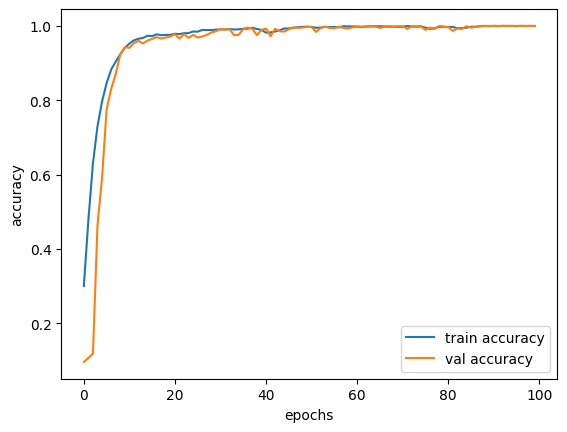

In [58]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [69]:
pitch_values = np.array(A_pitch)
pitch_values = pitch_values.reshape((pitch_values.shape[0], 1, 1))
pitch_values

array([[[ 5.6093235]],

       [[ 8.618578 ]],

       [[18.714079 ]],

       ...,

       [[25.24746  ]],

       [[ 6.3925314]],

       [[14.717337 ]]], dtype=float32)

In [70]:
history = model.fit(pitch_values, y, validation_split=0.2, epochs=100, batch_size=512, shuffle= True)

Epoch 1/100
9/9 [==============================] - 0s 14ms/step - loss: 1.8006 - accuracy: 0.2634 - val_loss: 2.2130 - val_accuracy: 0.1205
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 1.7930 - accuracy: 0.2717 - val_loss: 2.1564 - val_accuracy: 0.1116
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 1.7802 - accuracy: 0.2641 - val_loss: 2.1871 - val_accuracy: 0.0938
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 1.7809 - accuracy: 0.2685 - val_loss: 2.1814 - val_accuracy: 0.0893
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 1.7752 - accuracy: 0.2692 - val_loss: 2.1753 - val_accuracy: 0.0911
Epoch 6/100
9/9 [==============================] - 0s 11ms/step - loss: 1.7776 - accuracy: 0.2703 - val_loss: 2.1661 - val_accuracy: 0.0884
Epoch 7/100
9/9 [==============================] - 0s 9ms/step - loss: 1.7684 - accuracy: 0.2625 - val_loss: 2.1806 - val_accuracy: 0.0946
Epoch 8/100
9/9 [=======

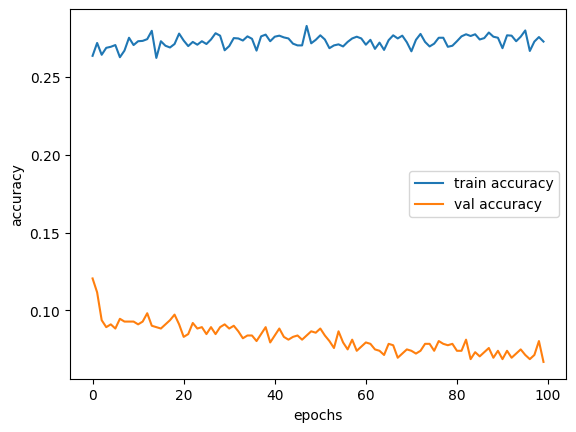

In [71]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [80]:
B_rhythm = np.array(B_rhythm)
rhythm_values = np.array([item[0] for item in B_rhythm])
rhythm_values = rhythm_values.reshape((rhythm_values.shape[0], 1, 1))
rhythm_values

array([[[172.265625  ]],

       [[129.19921875]],

       [[151.99908088]],

       ...,

       [[151.99908088]],

       [[ 99.38401442]],

       [[ 99.38401442]]])

In [81]:
history = model.fit(rhythm_values, y, validation_split=0.2, epochs=100, batch_size=512, shuffle= True)

Epoch 1/100
9/9 [==============================] - 0s 15ms/step - loss: 3.1610 - accuracy: 0.1980 - val_loss: 2.1644 - val_accuracy: 0.0268
Epoch 2/100
9/9 [==============================] - 0s 11ms/step - loss: 1.9040 - accuracy: 0.2109 - val_loss: 2.1644 - val_accuracy: 0.0000e+00
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 1.8792 - accuracy: 0.2379 - val_loss: 2.1936 - val_accuracy: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 1.8649 - accuracy: 0.2444 - val_loss: 2.2051 - val_accuracy: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 1.8519 - accuracy: 0.2549 - val_loss: 2.2251 - val_accuracy: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 1.8448 - accuracy: 0.2525 - val_loss: 2.2458 - val_accuracy: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 1.8396 - accuracy: 0.2650 - val_loss: 2.2584 - val_accuracy: 0.0000e+00

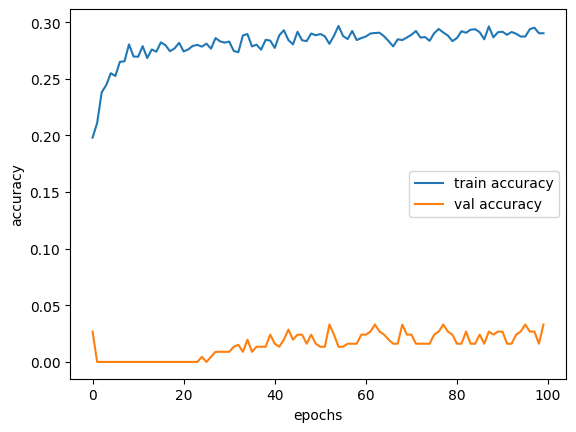

In [82]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [87]:
C_rhythm = np.array(C_spectral)
spectral_values = np.array([item[0] for item in C_spectral])
spectral_values = spectral_values.reshape((spectral_values.shape[0], 1, 1))
spectral_values

array([[[array([14.32512406, 13.01818447, 13.2918005 , 14.7160132 ,  9.62969471,
                22.08717819, 17.51139362, 13.40719942,  7.55026941, 18.7357507 ,
                17.31786891, 12.91426592, 14.34637698, 12.7224351 , 10.22701462,
                14.24555251, 13.10046279, 11.61513202, 14.45039717, 14.09204441,
                18.88683141, 19.8154204 , 18.23374141, 21.83976385, 16.5565835 ,
                15.59767905, 14.8613668 , 14.83507124, 15.56305957, 16.58499757,
                19.99063572, 17.93171813, 15.44844205, 14.02934288, 17.55633739,
                12.3050112 , 11.67656971, 10.7732316 , 10.6179779 ])            ]],

       [[array([10.39749188, 12.09145875, 13.25004742, 21.36111812, 14.50552057,
                17.77787658, 19.52421112, 16.78706007, 15.00249528, 14.41031102,
                17.52668037, 10.48748319, 17.00643127, 22.53475306, 22.25588746,
                20.15876649, 24.36050049, 21.4654901 , 15.43184869,  9.0298084 ,
                 8.63292

In [88]:
history = model.fit(rhythm_values, y, validation_split=0.2, epochs=100, batch_size=512, shuffle= True)

Epoch 1/100
9/9 [==============================] - 0s 13ms/step - loss: 1.7784 - accuracy: 0.2917 - val_loss: 2.2093 - val_accuracy: 0.0330
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 1.7868 - accuracy: 0.2944 - val_loss: 2.1710 - val_accuracy: 0.0268
Epoch 3/100
9/9 [==============================] - 0s 9ms/step - loss: 1.7817 - accuracy: 0.2897 - val_loss: 2.1622 - val_accuracy: 0.0161
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 1.7812 - accuracy: 0.2944 - val_loss: 2.1786 - val_accuracy: 0.0161
Epoch 5/100
9/9 [==============================] - 0s 10ms/step - loss: 1.7826 - accuracy: 0.2904 - val_loss: 2.1820 - val_accuracy: 0.0268
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 1.7816 - accuracy: 0.2951 - val_loss: 2.1963 - val_accuracy: 0.0330
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 1.7827 - accuracy: 0.2884 - val_loss: 2.1747 - val_accuracy: 0.0268
Epoch 8/100
9/9 [=======

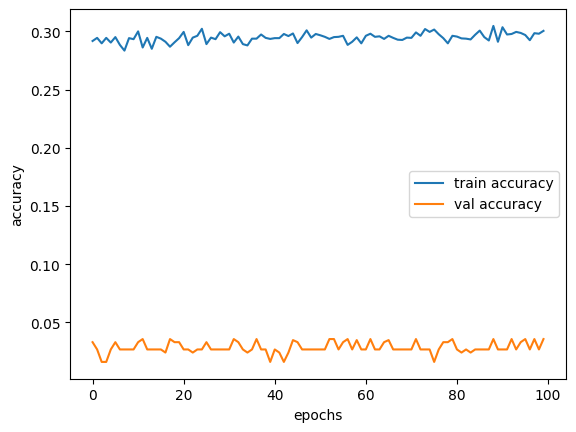

In [89]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()